# Data Science for Business - Chapter 3
> Introduction to Predictive Modeling: From Correlation to Supervised Segmentation

### by Daenam Kim

# Outline
1. Create a tree with IG based on the text book.
1. Test

# 1. Create a tree with IG based on the text book.

In [1]:
import copy
import math
from random import randint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

plt.style.use('seaborn-darkgrid')

SHOW = True

### Define Data

In [2]:
def get_learning_data():
    """
    Return learning data.
    
    """
    inputs = [
        {'age': 51, 'balance': 50120000, 'employed': 'True', 'residence': 'own', 'label': True},
        {'age': 66, 'balance': 52062500, 'employed': 'True', 'residence': 'other', 'label': True},
        {'age': 55, 'balance': 65350330, 'employed': 'True', 'residence': 'other', 'label': True},
        {'age': 57, 'balance': 70200120, 'employed': 'True', 'residence': 'other', 'label': True},
        {'age': 46, 'balance': 57009543, 'employed': 'True', 'residence': 'other', 'label': True},
        {'age': 53, 'balance': 125605301, 'employed': 'True', 'residence': 'other', 'label': True},
        {'age': 49, 'balance': 62103250, 'employed': 'True', 'residence': 'other', 'label': True},
        {'age': 70, 'balance': 112510050, 'employed': 'True', 'residence': 'other', 'label': True},
        {'age': 62, 'balance': 98445451, 'employed': 'True', 'residence': 'other', 'label': True},
        {'age': 55, 'balance': 78540668, 'employed': 'True', 'residence': 'other', 'label': True},
        {'age': 38, 'balance': 66580087, 'employed': 'True', 'residence': 'other', 'label': True},
        {'age': 42, 'balance': 77655065, 'employed': 'False', 'residence': 'other', 'label': True},
        {'age': 43, 'balance': 85465100, 'employed': 'True', 'residence': 'other', 'label': True},
        {'age': 57, 'balance': 32151130, 'employed': 'True', 'residence': 'other', 'label': True},
        {'age': 56, 'balance': 32215122, 'employed': 'True', 'residence': 'own', 'label': False},
        {'age': 33, 'balance': 67560608, 'employed': 'False', 'residence': 'own', 'label': False},
        {'age': 41, 'balance': 57951163, 'employed': 'True', 'residence': 'own', 'label': False},
        {'age': 39, 'balance': 98750651, 'employed': 'False', 'residence': 'own', 'label': False},
        {'age': 45, 'balance': 32135165, 'employed': 'False', 'residence': 'own', 'label': False},
        {'age': 49, 'balance': 583151, 'employed': 'False', 'residence': 'own', 'label': False},
        {'age': 37, 'balance': 99541, 'employed': 'False', 'residence': 'own', 'label': False},
        {'age': 33, 'balance': 1121465, 'employed': 'False', 'residence': 'other', 'label': False},
        {'age': 42, 'balance': 215521, 'employed': 'False', 'residence': 'other', 'label': False},
        {'age': 41, 'balance': 1283544, 'employed': 'False', 'residence': 'other', 'label': False},
        {'age': 35, 'balance': 2215985, 'employed': 'False', 'residence': 'other', 'label': False},
        {'age': 28, 'balance': 5565587, 'employed': 'False', 'residence': 'other', 'label': False},
        {'age': 32, 'balance': 992325, 'employed': 'False', 'residence': 'other', 'label': False},
        {'age': 31, 'balance': 68848, 'employed': 'False', 'residence': 'other', 'label': False},
        {'age': 29, 'balance': 984513, 'employed': 'False', 'residence': 'other', 'label': False},
        {'age': 30, 'balance': 2565845, 'employed': 'False', 'residence': 'other', 'label': False}
    ]
    
    return inputs


# Labels. (aka Targets)
LABELS = (True, False)

# Attributes. (aka Variables)
ATTRIBUTES = {
    'age': ['int', 45],
    'employed': ['str', 'True', 'False'],
    'balance': ['int', 50000000],
    'residence': ['str', 'own', 'other'],
}

INPUTS = pd.DataFrame(get_learning_data())
INPUTS = INPUTS[['age', 'balance', 'employed', 'residence', 'label']]
if SHOW:
    display(INPUTS)

,age,balance,employed,residence,label
0,51,50120000,True,own,True
1,66,52062500,True,other,True
2,55,65350330,True,other,True
3,57,70200120,True,other,True
4,46,57009543,True,other,True
5,53,125605301,True,other,True
6,49,62103250,True,other,True
7,70,112510050,True,other,True
8,62,98445451,True,other,True
9,55,78540668,True,other,True


### Attribute Selection for a Root Node based on the Information Gain

In [3]:
def get_p(a, b):
    len_a = len(a)
    len_b = len(b)

    if len_a == 0:
        len_a = 0.00000001
    
    if len_b == 0:
        len_b = 0.00000001
        
    return len_a / len_b

def get_entropy_params(labels, data):
    return (
        get_p(data[data['label'] == labels[0]], data),
        get_p(data[data['label'] == labels[1]], data)
    )

def get_entropy(labels, data):
    ps = get_entropy_params(labels, data)
    return -sum([p * math.log(p, 2) for p in ps])

def get_information_gain(labels, attributes, inputs):
    # Use labels only for a parent.
    data = inputs[['label']]
    entropy_parent = get_entropy(labels, data)

    entropies = {'parent': entropy_parent}
    igs = {}
    for attr_name, attr_values in attributes.items():
        data = inputs[[attr_name, 'label']]
        mode = attr_values[0]
        if mode == 'int':
            attr_value = attr_values[1]
            igs[attr_name] = entropy_parent - (
                get_p(data[data[attr_name] < attr_value], data) * get_entropy(labels, data[data[attr_name] < attr_value]) +
                get_p(data[data[attr_name] >= attr_value], data) * get_entropy(labels, data[data[attr_name] >= attr_value])
            )
            entropies[attr_name + '<' + str(attr_value)] = get_entropy(labels, data[data[attr_name] < attr_value])
            entropies[attr_name + '>=' + str(attr_value)] = get_entropy(labels, data[data[attr_name] >= attr_value])
        else:
            children = []
            for attr_value in attr_values[1:]:
                children.append(get_p(data[data[attr_name] == attr_value], data) * get_entropy(labels, data[data[attr_name] == attr_value]))
                entropies[attr_name + '_' + attr_value] = get_entropy(labels, data[data[attr_name] == attr_value])
            
            igs[attr_name] = entropy_parent - sum(children)

    return igs, entropies

In [4]:
igs, entropies = get_information_gain(LABELS, ATTRIBUTES, INPUTS)
entropies_sorted  = sorted(entropies.items(), key=lambda x: x[1])
entropies_df = pd.DataFrame(entropies_sorted, columns=['Attribute', 'Entropy ( ↑ )'])
if SHOW:
    display(entropies_df)

,Attribute,Entropy ( ↑ )
0,employed_False,0.353359
1,balance<50000000,0.371232
2,residence_own,0.543564
3,employed_True,0.566510
4,age<45,0.696212
5,balance>=50000000,0.696212
6,age>=45,0.749595
7,residence_other,0.976021
8,parent,0.996792


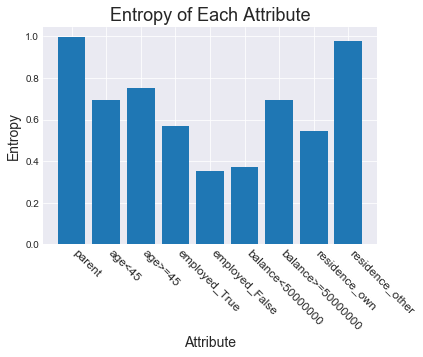

In [5]:
plt.title('Entropy of Each Attribute', fontsize=18)
plt.ylabel('Entropy', fontsize=14)
plt.xlabel('Attribute', fontsize=14)
plt.xticks(range(len(entropies)), entropies.keys(), rotation=-45, ha='left', fontsize=12)
plt.bar(range(len(entropies)), entropies.values(), align='center')
plt.show()

In [6]:
igs_sorted  = sorted(igs.items(), key=lambda x: x[1], reverse=True)
igs_df = pd.DataFrame(igs_sorted, columns=['Attribute', 'IG ( ↓ )'])
if SHOW:
    display(igs_df)

,Attribute,IG ( ↓ )
0,employed,0.536857
1,balance,0.452237
2,age,0.275667
3,residence,0.136093


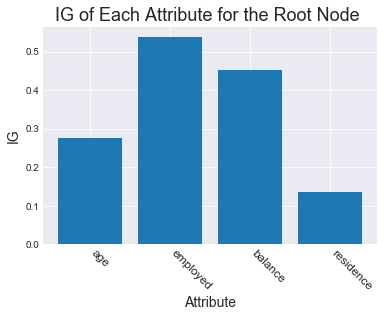

In [7]:
plt.title('IG of Each Attribute for the Root Node ', fontsize=18)
plt.ylabel('IG', fontsize=14)
plt.xlabel('Attribute', fontsize=14)
plt.xticks(range(len(igs)), igs.keys(), rotation=-45, ha='left', fontsize=12)
plt.bar(range(len(igs)), igs.values(), align='center')
plt.show()

### Devide-and-Conquer and Tree-Structured Model

In [8]:
class Tree():

    def __init__(self, **kwargs):
        self.left =  None
        self.right = None
        self.evaluation = 'Are you kidding me?'
        self.update(**kwargs)

    def add(self, **kwargs):
        if kwargs['direction'] == 'left':
            self.left = Tree(**kwargs)
            return self.left
        else:
            self.right = Tree(**kwargs)
            return self.right

    def update(self, **kwargs):
        self.id = kwargs.get('id', None)
        self.key = kwargs.get('key', None)
        self.values = kwargs.get('values', None)
        self.mode =  kwargs.get('mode', None)
        self.depth =  kwargs.get('depth', 0)
        self.direction = kwargs.get('direction', None)
        self.evaluation = kwargs.get('evaluation', None)
        return self
    
    def evaluate(self, **kwargs):
        if self.key is None:
            return self.evaluation
        
        attr_value = kwargs[self.key]
        if self.mode == 'int':
            if attr_value < self.values[0]:
                if self.left is not None:
                    return self.left.evaluate(**kwargs)
                else:
                    return self.evaluation
            else:
                if self.right is not None:
                    return self.right.evaluate(**kwargs)
                else:
                    return self.evaluation
        else:
            if attr_value == self.values[0]:
                if self.left is not None:
                    return self.left.evaluate(**kwargs)
                else:
                    return self.evaluation
            else:
                if self.right is not None:
                    return self.right.evaluate(**kwargs)
                else:
                    return self.evaluation

    def __str__(self):
        if self.left != None:
            self.left.__str__()

        print({
            'id': self.id,
            'key': self.key,
            'values': self.values,
            'mode': self.mode,
            'depth': self.depth,
            'direction': self.direction,
            'evaluation': self.evaluation
        })

        if self.right != None:
            self.right.__str__()


def is_write_off(labels, data):
        no_write_off = len(data[data['label'] == labels[0]])
        write_off = len(data[data['label'] == labels[1]])
        
        if no_write_off < 1 and write_off < 1:
            return 'ERROR'
        elif no_write_off > write_off:
            return 'NO-WRITE-OFF'
        else:
            return 'WRITE-OFF'


def get_terminal_node_data(node_id, depth, direction, labels, data):
        return {
            'id': node_id,
            'key': None,
            'values': None,
            'mode': None,
            'depth': depth,
            'direction': direction,
            'evaluation': is_write_off(labels, data)
        }

In [9]:
def create_tree(tree, labels, attributes, inputs, depth=0, max_depth=10, node_id=None, direction=None):
    if tree is None:
        return

    """
    Conditions to become a terminal node.
    
    1. At the entropy is smaller than "entropy_limit".
    2. At no left or right data after dividing by the "attribute".
    3. At the specific "max_depth".
    """
    igs, entropies = get_information_gain(labels, attributes , inputs)
    igs_sorted  = sorted(igs.items(), key=lambda x: x[1], reverse=True)
    igs_max = igs_sorted[0]
    attr_key = igs_max[0]
    attr_values = attributes[attr_key]
    mode = attr_values[0]
    if mode == 'int':
        v = attr_values[1]
        inputs_left = inputs[inputs[attr_key] < v]
        inputs_right = inputs[inputs[attr_key] >= v]
    else:
        inputs_left = inputs[inputs[attr_key] == attr_values[1]]
        inputs_right = inputs[inputs[attr_key] == attr_values[2]]

    inputs_left.reset_index(inplace=True)
    inputs_right.reset_index(inplace=True)
    del inputs_left['index']
    del inputs_right['index']
    if node_id is None:
        node_id = 1

    node_data = {
        'id': node_id,
        'key': attr_key,
        'values': attr_values[1:],
        'mode': mode,
        'depth': depth,
        'direction': direction,
    }

    entropy_limit = 0.1
    
    if (depth >= max_depth) or len(inputs_left) == 0 or len(inputs_right) == 0 or \
        get_entropy(labels, inputs_left) < entropy_limit or get_entropy(labels, inputs_right) < entropy_limit:

        next_node = tree.add(**node_data)
        next_node.update(**get_terminal_node_data(node_id, depth, direction, labels, inputs))
        return
    elif depth == 0:
        next_node = tree.update(**node_data)
    else:
        next_node = tree.add(**node_data)

    if depth == 0:
        # Update attributes based on the biggest IG at the first time only.
        next_attributes = {k: v for k, v in attributes.items() if k != attr_key}
    else:
        next_attributes = attributes
    
    create_tree(next_node, labels, next_attributes, inputs_left, depth + 1, max_depth, node_id * 2, 'left')
    create_tree(next_node, labels, next_attributes, inputs_right, depth + 1, max_depth, (node_id * 2) + 1, 'right')
        
tree = Tree()
# Remove "residence" attribute because its IG is lower than others.
create_tree(tree, LABELS, {k: v for k, v in ATTRIBUTES.items() if k != 'residence'}, INPUTS)
tree.__str__()

{'id': 4, 'key': None, 'values': None, 'mode': None, 'depth': 2, 'direction': 'left', 'evaluation': 'WRITE-OFF'}
{'id': 2, 'key': 'balance', 'values': [50000000], 'mode': 'int', 'depth': 1, 'direction': 'left', 'evaluation': None}
{'id': 5, 'key': None, 'values': None, 'mode': None, 'depth': 2, 'direction': 'right', 'evaluation': 'NO-WRITE-OFF'}
{'id': 1, 'key': 'employed', 'values': ['True', 'False'], 'mode': 'str', 'depth': 0, 'direction': None, 'evaluation': None}
{'id': 3, 'key': None, 'values': None, 'mode': None, 'depth': 1, 'direction': 'right', 'evaluation': 'WRITE-OFF'}


# 2. Test

In [10]:
# Test for learning data.
inputs = list(INPUTS.T.to_dict().values())
for data in inputs:
    data['evaluation'] = tree.evaluate(**data)

evaluations = pd.DataFrame(inputs)
evaluations = evaluations[['age', 'balance', 'employed', 'residence', 'label', 'evaluation']]
display(evaluations)

,age,balance,employed,residence,label,evaluation
0,51,50120000,True,own,True,NO-WRITE-OFF
1,66,52062500,True,other,True,NO-WRITE-OFF
2,55,65350330,True,other,True,NO-WRITE-OFF
3,57,70200120,True,other,True,NO-WRITE-OFF
4,46,57009543,True,other,True,NO-WRITE-OFF
5,53,125605301,True,other,True,NO-WRITE-OFF
6,49,62103250,True,other,True,NO-WRITE-OFF
7,70,112510050,True,other,True,NO-WRITE-OFF
8,62,98445451,True,other,True,NO-WRITE-OFF
9,55,78540668,True,other,True,NO-WRITE-OFF


In [11]:
no_write_off = evaluations[(evaluations['label'] == True) & (evaluations['evaluation'] == 'NO-WRITE-OFF')]
write_off = evaluations[(evaluations['label'] == False) & (evaluations['evaluation'] == 'WRITE-OFF')]
total = len(evaluations)
matched = len(no_write_off) + len(write_off)
print('Accuracy of LEARNING DATA is ' + str(matched / total))

Accuracy of LEARNING DATA is 0.9
